In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
from sklearn.datasets import make_blobs
x1,y1=make_blobs(n_samples=1000,centers=((3,-3),(1,1)),random_state=1)
x1=x1.dot(np.array([[0.4,1],[0.7,0.6]]))
x2,y2=make_blobs(n_samples=300,centers=1,random_state=1)
x2=x2+[6,-3]
x=np.r_[x1,x2]
y=np.r_[y1,y2]

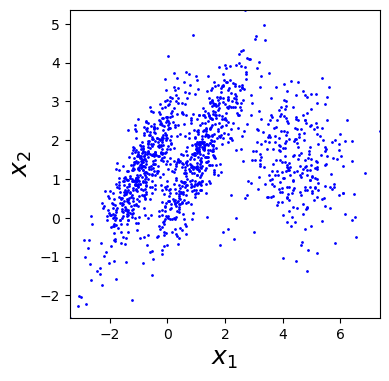

In [77]:
plt.figure(figsize=(4,4))
plt.scatter(x[:,0],x[:,1],c='b',s=1)
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18)
mins=x.min(axis=0)
maxs=x.max(axis=0)
plt.axis([mins[0],maxs[0],mins[1],maxs[1]])
plt.show()

In [93]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=3,n_init=10,covariance_type='full',random_state=1)
gm.fit(x)

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

GaussianMixture(n_components=3, n_init=10, random_state=1)

In [94]:
pi=gm.weights_
pi

array([0.38650747, 0.23233747, 0.38115506])

In [95]:
mu=gm.means_
mu

array([[-0.85825108,  1.26229706],
       [ 4.37283221,  1.48414028],
       [ 1.13245359,  1.65188929]])

In [96]:
Sigma=gm.covariances_
Sigma

array([[[ 0.59004708,  0.72708102],
        [ 0.72708102,  1.22730296]],

       [[ 0.97765035, -0.08571483],
        [-0.08571483,  1.01359424]],

       [[ 0.65972267,  0.85201622],
        [ 0.85201622,  1.45487237]]])

In [97]:
gm.score_samples(x)

array([-2.72456154, -2.2719355 , -2.1769829 , ..., -4.00439117,
       -3.58332253, -4.59438607])

In [98]:
gm.predict(x)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [99]:
gm.predict_proba(x)

array([[9.89013775e-01, 1.58772476e-05, 1.09703480e-02],
       [9.99142985e-01, 5.36389838e-06, 8.51650836e-04],
       [1.72921921e-04, 2.42484819e-03, 9.97402230e-01],
       ...,
       [9.20779376e-46, 1.00000000e+00, 5.85225346e-22],
       [5.83866954e-24, 9.99999950e-01, 4.98335552e-08],
       [2.96547926e-46, 1.00000000e+00, 2.41443835e-22]])

In [12]:
def plot_gaussian_mixture(clusterer,x):
    mins=x.min(axis=0)
    maxs=x.max(axis=0)
    x1s=np.linspace(mins[0],maxs[0],1000)
    x2s=np.linspace(mins[1],maxs[1],1000)
    x1,x2=np.meshgrid(x1s,x2s)
    x_new=np.c_[x1.ravel(),x2.ravel()]
    z=-clusterer.score_samples(x_new).reshape(x1.shape)
    y_pred=clusterer.predict(x_new).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred,alpha=0.2)
    plt.contour(x1,x2,y_pred,linewidths=1,colors='r',linestyles='dashed')
    plt.contour(x1,x2,z,levels=np.logspace(0,2,12),linewidths=1,colors='g')
    plt.plot(x[:,0],x[:,1],'k.',markersize=2)
    plt.scatter(mu[:,0],mu[:,1],marker='x',s=5,linewidths=10,color='r',alpha=1,zorder=3)
    plt.xlabel("$x_1$",fontsize=18)
    plt.ylabel("$x_2$",fontsize=18)
    plt.axis([mins[0],maxs[0],mins[1],maxs[1]])

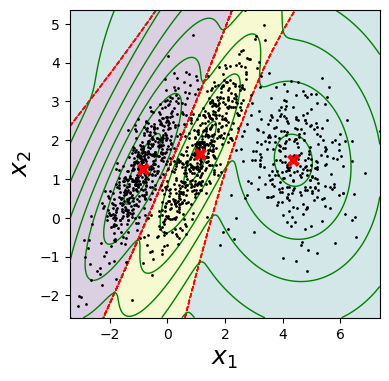

In [13]:
plt.figure(figsize=(4,4))
plot_gaussian_mixture(gm,x)
plt.show()

In [14]:
densities=gm.score_samples(x)
density_threshold=np.percentile(densities,4)
anom=x[densities<density_threshold]

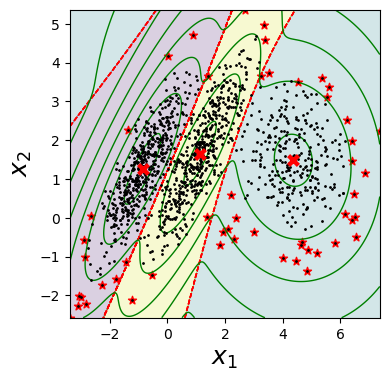

In [15]:
plt.figure(figsize=(4,4))
plot_gaussian_mixture(gm,x)
plt.scatter(anom[:,0],anom[:,1],color='r',marker='*')
plt.show()

In [16]:
gm.bic(x)

8615.381297206244

In [17]:
gm.aic(x)

8527.4892649676

In [18]:
gms_k=[GaussianMixture(n_components=k,n_init=10,random_state=1).fit(x)
      for k in range(1,10)]

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [19]:
bics=[model.bic(x) for model in gms_k]
aics=[model.aic(x) for model in gms_k]

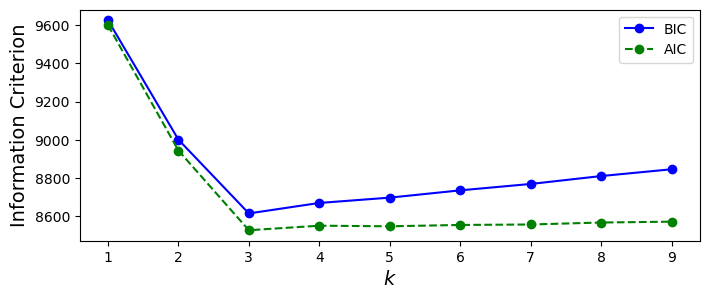

In [20]:
plt.figure(figsize=(8,3))
plt.plot(range(1,10),bics,'bo-',label='BIC')
plt.plot(range(1,10),aics,'go--',label='AIC')
plt.xlabel('$k$',fontsize=14)
plt.ylabel('Information Criterion',fontsize=14)
plt.legend()
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import load_sample_images
dataset=load_sample_images()
Img=dataset.images[1]
Img.shape

(427, 640, 3)

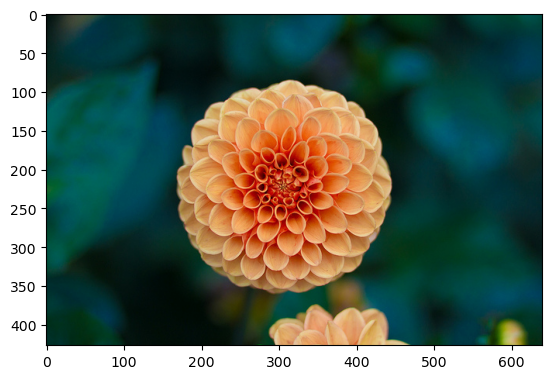

In [25]:
img=Img/255
plt.imshow(img)
plt.show()

In [26]:
x=img.reshape(-1,3)
x.shape

(273280, 3)

In [30]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0).fit(x)

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
kmeans.cluster_centers_

array([[0.82530714, 0.53230456, 0.31300743],
       [0.02515802, 0.21208472, 0.195464  ]])

In [32]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
seg_img=kmeans.cluster_centers_[kmeans.labels_]
seg_img

array([[0.02515802, 0.21208472, 0.195464  ],
       [0.02515802, 0.21208472, 0.195464  ],
       [0.02515802, 0.21208472, 0.195464  ],
       ...,
       [0.02515802, 0.21208472, 0.195464  ],
       [0.02515802, 0.21208472, 0.195464  ],
       [0.02515802, 0.21208472, 0.195464  ]])

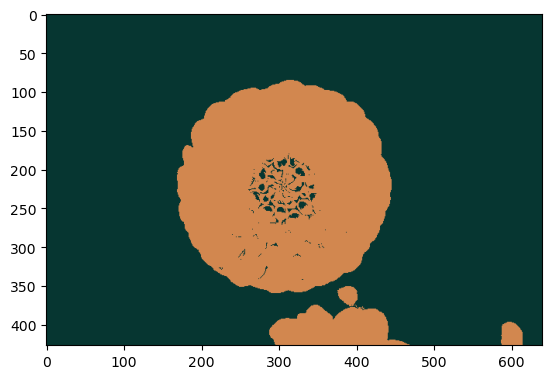

In [34]:
seg_img=seg_img.reshape(img.shape)
plt.imshow(seg_img)
plt.show()

In [35]:
from sklearn.datasets import load_digits
x,y=load_digits(return_X_y=True)
x.shape,y.shape

((1797, 64), (1797,))

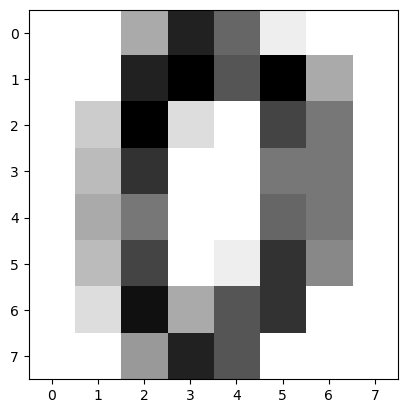

In [36]:
i=0
xi=x[i].reshape(8,8)
plt.imshow(xi,cmap='binary')
plt.show()

In [37]:
y[i]

0

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=1)

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(multi_class='ovr',max_iter=5000,random_state=1)
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.9577777777777777

In [131]:
kmeans=KMeans(n_clusters=64,random_state=1)
x_train_dist=kmeans.fit_transform(x_train,y_train)
x_train_dist.shape

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


(1347, 64)

In [136]:
log_reg=LogisticRegression(multi_class='ovr',max_iter=5000,random_state=1)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=1)

In [137]:
x_test_dist=kmeans.transform(x_test)
log_reg.score(x_test_dist,y_test)

0.10444444444444445

In [53]:
from sklearn.pipeline import Pipeline
pip=Pipeline([
    ('kmeans',KMeans(n_clusters=40,random_state=1)),
    ('log_reg',LogisticRegression(multi_class='ovr',max_iter=5000,random_state=1))
])
pip.fit(x_train,y_train)
pip.score(x_test,y_test)

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


0.9688888888888889

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid=dict(kmeans__n_clusters=np.linspace(20,100,5).astype(np.int32))
grid_clf=GridSearchCV(pip,param_grid,cv=3,verbose=2)
grid_clf.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=20; total time=   1.0s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=20; total time=   1.1s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=20; total time=   0.9s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=40; total time=   1.7s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=40; total time=   1.5s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=40; total time=   1.6s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=60; total time=   2.0s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=60; total time=   1.9s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=60; total time=   1.8s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=80; total time=   2.0s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=80; total time=   1.7s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..............................kmeans__n_clusters=80; total time=   1.8s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END .............................kmeans__n_clusters=100; total time=   2.3s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END .............................kmeans__n_clusters=100; total time=   2.3s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END .............................kmeans__n_clusters=100; total time=   1.9s


C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=40, random_state=1)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=1))]),
             param_grid={'kmeans__n_clusters': array([ 20,  40,  60,  80, 100])},
             verbose=2)

In [64]:
grid_clf.best_params_

{'kmeans__n_clusters': 100}

In [65]:
rlt=grid_clf.cv_results_
for mean_score, params in zip(rlt['mean_test_score'],rlt['params']):
    print(mean_score,params)

0.9576837416481069 {'kmeans__n_clusters': 20}
0.969561989606533 {'kmeans__n_clusters': 40}
0.9740163325909429 {'kmeans__n_clusters': 60}
0.9740163325909429 {'kmeans__n_clusters': 80}
0.9762435040831478 {'kmeans__n_clusters': 100}


In [66]:
grid_clf.best_estimator_.score(x_test,y_test)

0.9755555555555555

In [67]:
k=50
kmeans=KMeans(n_clusters=k,random_state=1)
x_dist=kmeans.fit_transform(x_train)

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [68]:
rep_ind=np.argmin(x_dist,axis=0)
x_train_rep=x_train[rep_ind]

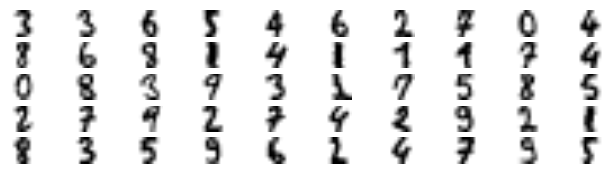

In [69]:
plt.figure(figsize=(8,2))
for idx,xi in enumerate(x_train_rep):
    plt.subplot(k//10,10,idx+1)
    plt.imshow(xi.reshape(8,8),cmap='binary',interpolation='bilinear')
    plt.axis('off')
plt.show()

In [70]:
y_rep=np.array([
    9,2,0,4,7,5,1,6,3,1,
    2,3,1,6,8,5,2,9,4,4,
    7,4,8,3,6,9,5,7,7,2,
    2,1,4,7,3,0,9,4,7,3,
    1,1,3,1,0,2,8,9,8,4
])

In [71]:
y_train_propagated=np.empty(len(x_train),dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i]=y_rep[i]

In [72]:
x_train.shape,y_train_propagated.shape

((1347, 64), (1347,))

In [73]:
log_reg=LogisticRegression(multi_class='ovr',max_iter=5000,
                          random_state=1)
log_reg.fit(x_train,y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=1)

In [74]:
log_reg.score(x_test,y_test)

0.04666666666666667